In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import plotly.plotly as py
from plotly import tools
from wordcloud import WordCloud
from datetime import date
import random 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def bar_hor_noagg(x, y, title, color, w=None, h=None, lm=0, limit=100, rt=False):
    trace = go.Bar(y=x, x=y, orientation = 'h', marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


def bar_ver_noagg(x, y, title, color, w=None, h=None, lm=0, rt = False):
    trace = go.Bar(y=y, x=x, marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
def gp(col, title):
    df1 = app_train[app_train["default"] == 1]
    df0 = app_train[app_train["default"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()
    
    total = dict(app_train[col].value_counts())
    x0 = a1.index
    x1 = b1.index
    
    y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
    y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

    trace1 = go.Bar(x=a1.index, y=y0, name='default : 1', marker=dict(color="#96D38C"))
    trace2 = go.Bar(x=b1.index, y=y1, name='default : 0', marker=dict(color="#FEBFB3"))
    return trace1, trace2 

In [3]:
# Import the data
os.getcwd()
app_train = pd.read_csv("./train_data.csv")
app_train

,id,loan_status,mths_since_last_major_derog,revol_bal,purpose,addr_state,title,home_ownership,application_type,verification_status_joint,earliest_cr_line,apply_date,verification_status,emp_length,dti,emp_title,annual_inc
0,63480419,Current,NaN,15954,debt_consolidation,KS,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,5-Aug,15-Nov,Not Verified,5 years,24.85,Branch Office Administrator,62000.0
1,51386490,Current,NaN,73814,debt_consolidation,MD,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,Sep-83,15-Jun,Verified,10+ years,26.38,IIntelligence Analyst,113000.0
2,13567696,Current,NaN,30013,major_purchase,TX,Major purchase,OWN,INDIVIDUAL,NaN,Dec-99,14-Apr,Not Verified,10+ years,14.41,Global Service Delivery Lead,180000.0
3,22252931,Fully Paid,NaN,10768,credit_card,DE,Credit card refinancing,MORTGAGE,INDIVIDUAL,NaN,1-Sep,14-Jul,Not Verified,10+ years,24.31,Operations Manager,66000.0
4,6539569,Fully Paid,NaN,35551,home_improvement,WI,Home Improvement,MORTGAGE,INDIVIDUAL,NaN,Dec-92,13-Aug,Verified,2 years,1.70,Coram Specialty Infusion,110000.0
5,35683119,Current,NaN,10327,debt_consolidation,MI,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,3-Jun,14-Nov,Source Verified,4 years,19.98,machine operator,60000.0
6,28674611,Current,NaN,41756,debt_consolidation,CA,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,Jun-86,14-Oct,Verified,10+ years,20.11,Assistant Manager,82000.0
7,7047928,Fully Paid,NaN,40836,debt_consolidation,OH,Debt Consolidation,MORTGAGE,INDIVIDUAL,NaN,Jun-99,13-Sep,Not Verified,6 years,19.86,STERIS,98005.0
8,51186597,Current,76.0,5259,debt_consolidation,NC,Debt consolidation,RENT,INDIVIDUAL,NaN,6-Feb,15-Jun,Not Verified,10+ years,5.01,Owner,60000.0
9,1060578,Fully Paid,NaN,25237,debt_consolidation,RI,debt,RENT,INDIVIDUAL,NaN,4-Jun,11-Dec,Not Verified,10+ years,20.01,citizens bank,55000.0


# Exploratory Data Analysis

In [4]:
# Check how many features are there, and how many data rows are there
app_train.shape

(200000, 17)

In [5]:
# Check data types, number of rows and columns
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 17 columns):
id                             200000 non-null int64
loan_status                    200000 non-null object
mths_since_last_major_derog    49745 non-null float64
revol_bal                      200000 non-null int64
purpose                        200000 non-null object
addr_state                     200000 non-null object
title                          199964 non-null object
home_ownership                 200000 non-null object
application_type               200000 non-null object
verification_status_joint      111 non-null object
earliest_cr_line               199989 non-null object
apply_date                     200000 non-null object
verification_status            200000 non-null object
emp_length                     189735 non-null object
dti                            200000 non-null float64
emp_title                      188207 non-null object
annual_inc                   

In [6]:
# Check missing values/ number of NaN
app_train.isnull().sum()

id                                  0
loan_status                         0
mths_since_last_major_derog    150255
revol_bal                           0
purpose                             0
addr_state                          0
title                              36
home_ownership                      0
application_type                    0
verification_status_joint      199889
earliest_cr_line                   11
apply_date                          0
verification_status                 0
emp_length                      10265
dti                                 0
emp_title                       11793
annual_inc                          2
dtype: int64

In [7]:
app_train.application_type.value_counts()

INDIVIDUAL    199889
JOINT            111
Name: application_type, dtype: int64

I notice that most data are missing for "mths_since_last_major_derog" and "verification_status_joint". Most likely to drop these columns. The rest of missing columns are: "emp_title", "emp_length", "title", "earliest_cr_line", "annual_inc". I also notice that the column 'purpose' and 'title' contain essential the same information. As a result, we can drop the column 'title'.
Vast majority of applications are individual! 99%. Therefore we can think of dropping this column.

In [8]:
app_train.loan_status.value_counts()

Current                                                135528
Fully Paid                                              46837
Charged Off                                             10270
Late (31-120 days)                                       2626
Issued                                                   1919
In Grace Period                                          1411
Late (16-30 days)                                         509
Does not meet the credit policy. Status:Fully Paid        452
Default                                                   288
Does not meet the credit policy. Status:Charged Off       160
Name: loan_status, dtype: int64

In [9]:
def f(row):
    if row['loan_status'] in ['Fully Paid']:
        val = 0
    elif row['loan_status'] in ['Charged Off', 'Late (31-120 days)', 'Default']:
        val = 1
    else: val = -1    
    return val

In [10]:
app_train['default'] = app_train.apply(f, axis=1)
app_train.default.value_counts()

-1    139979
 0     46837
 1     13184
Name: default, dtype: int64

In [11]:
app_train = app_train[(app_train.default == 0) | (app_train.default == 1)]
app_train

,id,loan_status,mths_since_last_major_derog,revol_bal,purpose,addr_state,title,home_ownership,application_type,verification_status_joint,earliest_cr_line,apply_date,verification_status,emp_length,dti,emp_title,annual_inc,default
3,22252931,Fully Paid,NaN,10768,credit_card,DE,Credit card refinancing,MORTGAGE,INDIVIDUAL,NaN,1-Sep,14-Jul,Not Verified,10+ years,24.31,Operations Manager,66000.0,0
4,6539569,Fully Paid,NaN,35551,home_improvement,WI,Home Improvement,MORTGAGE,INDIVIDUAL,NaN,Dec-92,13-Aug,Verified,2 years,1.70,Coram Specialty Infusion,110000.0,0
7,7047928,Fully Paid,NaN,40836,debt_consolidation,OH,Debt Consolidation,MORTGAGE,INDIVIDUAL,NaN,Jun-99,13-Sep,Not Verified,6 years,19.86,STERIS,98005.0,0
9,1060578,Fully Paid,NaN,25237,debt_consolidation,RI,debt,RENT,INDIVIDUAL,NaN,4-Jun,11-Dec,Not Verified,10+ years,20.01,citizens bank,55000.0,0
10,28604357,Fully Paid,NaN,17469,debt_consolidation,SD,Debt consolidation,RENT,INDIVIDUAL,NaN,Jul-96,14-Oct,Source Verified,10+ years,16.76,Sr. Research Analyst,71500.0,0
12,1434490,Fully Paid,NaN,7992,debt_consolidation,AR,Debt Pay Off,MORTGAGE,INDIVIDUAL,NaN,Mar-95,12-Aug,Source Verified,10+ years,18.22,LITTLE ROCK POLICE DEPARTMENT,93000.0,0
13,1605698,Fully Paid,NaN,20720,debt_consolidation,GA,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,Jan-90,12-Oct,Verified,10+ years,20.73,GA DEPT OF AGRICULTURE,40000.0,0
15,12205058,Fully Paid,NaN,7953,debt_consolidation,MO,Debt consolidation,MORTGAGE,INDIVIDUAL,NaN,May-96,14-Feb,Source Verified,10+ years,29.38,waitress,23000.0,0
16,1396541,Charged Off,NaN,17212,credit_card,NY,Consolidate,RENT,INDIVIDUAL,NaN,4-Dec,12-Jul,Verified,3 years,25.20,Kerwick & Curran,48000.0,1
19,650922,Fully Paid,NaN,7839,debt_consolidation,NC,Financial Freedom (Debt Consolidation),RENT,INDIVIDUAL,NaN,3-Sep,11-Jan,Verified,3 years,14.29,"U.S. Trust, Bank of America",54250.0,0


In [12]:
# Target Variable Distribution 
init_notebook_mode(connected=True)
bar_hor(app_train, "default", "Distribution of default variable" , ["#44ff54", '#ff4444'], h=350, w=600, lm=200, xlb = ['default : 1','default : 0'])

In [13]:
app_train.drop(['loan_status'], axis=1, inplace=True)
app_train.drop(['mths_since_last_major_derog', 'verification_status_joint'], axis=1, inplace=True)
app_train.drop(['title'], axis=1, inplace=True)
app_train.drop(['application_type'], axis=1, inplace=True)

In [14]:
app_train

,id,revol_bal,purpose,addr_state,home_ownership,earliest_cr_line,apply_date,verification_status,emp_length,dti,emp_title,annual_inc,default
3,22252931,10768,credit_card,DE,MORTGAGE,1-Sep,14-Jul,Not Verified,10+ years,24.31,Operations Manager,66000.0,0
4,6539569,35551,home_improvement,WI,MORTGAGE,Dec-92,13-Aug,Verified,2 years,1.70,Coram Specialty Infusion,110000.0,0
7,7047928,40836,debt_consolidation,OH,MORTGAGE,Jun-99,13-Sep,Not Verified,6 years,19.86,STERIS,98005.0,0
9,1060578,25237,debt_consolidation,RI,RENT,4-Jun,11-Dec,Not Verified,10+ years,20.01,citizens bank,55000.0,0
10,28604357,17469,debt_consolidation,SD,RENT,Jul-96,14-Oct,Source Verified,10+ years,16.76,Sr. Research Analyst,71500.0,0
12,1434490,7992,debt_consolidation,AR,MORTGAGE,Mar-95,12-Aug,Source Verified,10+ years,18.22,LITTLE ROCK POLICE DEPARTMENT,93000.0,0
13,1605698,20720,debt_consolidation,GA,MORTGAGE,Jan-90,12-Oct,Verified,10+ years,20.73,GA DEPT OF AGRICULTURE,40000.0,0
15,12205058,7953,debt_consolidation,MO,MORTGAGE,May-96,14-Feb,Source Verified,10+ years,29.38,waitress,23000.0,0
16,1396541,17212,credit_card,NY,RENT,4-Dec,12-Jul,Verified,3 years,25.20,Kerwick & Curran,48000.0,1
19,650922,7839,debt_consolidation,NC,RENT,3-Sep,11-Jan,Verified,3 years,14.29,"U.S. Trust, Bank of America",54250.0,0


In [15]:
app_train.purpose.value_counts()

debt_consolidation    35537
credit_card           11685
home_improvement       3537
other                  3381
major_purchase         1405
small_business         1081
car                     868
medical                 679
moving                  506
house                   420
wedding                 414
vacation                371
educational              77
renewable_energy         60
Name: purpose, dtype: int64

In [16]:
tr0 = bar_hor(app_train, "purpose", "Distribution of purpose Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('purpose', 'Distribution of Default with Home Ownership')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["purpose Distribution" , "purpose, default=1" ,"purpose, default=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

The main purpose of getting loans are for "debt_consolidation", followed by "credit_card", and "home_improvement". Interestingly, "credit_card" and "home_improvement" puspose tend to "default" the less, while "small_business" has the highest default rate. Therefore, it's likely that purpose is among good feature for classification. 

In [17]:
app_train.addr_state.value_counts()

CA    10011
NY     5066
TX     4613
FL     4240
NJ     2305
IL     2144
PA     1973
GA     1942
VA     1864
OH     1820
NC     1665
AZ     1494
MA     1439
MD     1438
MI     1406
WA     1397
CO     1353
MN     1035
MO      904
CT      887
NV      877
OR      809
AL      766
LA      740
WI      738
SC      713
IN      640
TN      586
OK      549
KY      530
KS      489
UT      482
AR      434
HI      364
NM      311
WV      280
NH      270
RI      254
DC      205
DE      186
MT      167
AK      151
WY      139
SD      134
VT      104
MS       94
NE        8
IA        3
ME        2
Name: addr_state, dtype: int64

In [18]:
tr0 = bar_hor(app_train, "addr_state", "Distribution of addr_state Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('addr_state', 'Distribution of Default with Home Ownership')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["addr_state Distribution" , "addr_state, default=1" ,"addr_state, default=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=650, showlegend=False, margin=dict(l=50));
iplot(fig);

Notice that most borrowers are from CA and NY, followed by TX and FL. This is understandable due to their corresponding population. Interestingly, some states that have very few applications are among the ones that have highest default rates.

In [19]:
# Check home ownership
app_train.home_ownership.value_counts()

MORTGAGE    29526
RENT        25173
OWN          5279
OTHER          34
NONE            8
ANY             1
Name: home_ownership, dtype: int64

In [20]:
tr0 = bar_hor(app_train, "home_ownership", "Distribution of home_ownership Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('home_ownership', 'Distribution of Default with Home Ownership')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Home Ownership Distribution" , "home_ownership, default=1" ,"home_ownership, default=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

Most borrowers are having mortgage (%), followed by 'rent' (%)

In [21]:
# verification_status 	emp_length 	dti 	emp_title 	annual_inc
# Check verification status
app_train.verification_status.value_counts()

Verified           22292
Not Verified       19936
Source Verified    17793
Name: verification_status, dtype: int64

In [22]:
tr0 = bar_hor(app_train, "verification_status", "Distribution of verification_status Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('verification_status', 'Distribution of Default with verification_status')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["verification_status Distribution" , "verification_status, default=1" ,"verification_status, default=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

In [23]:
# Check employment length
app_train.emp_length.value_counts()

10+ years    18298
2 years       5618
3 years       4895
< 1 year      4890
5 years       4243
1 year        3944
4 years       3788
6 years       3558
7 years       3311
8 years       2777
9 years       2253
Name: emp_length, dtype: int64

In [24]:
tr0 = bar_hor(app_train, "emp_length", "Distribution of emp_length Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('emp_length', 'Distribution of Default with emp_length')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["emp_length Distribution" , "emp_length, default=1" ,"emp_length, default=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

Insight? People who have been working in a while might have need regarding 'debt_consolidation'...?

In [25]:
app_train.emp_title.value_counts()

Manager                                     489
Teacher                                     431
Registered Nurse                            202
Supervisor                                  201
RN                                          176
Sales                                       173
Project Manager                             159
manager                                     157
Driver                                      155
Office Manager                              138
Director                                    132
Engineer                                    118
Owner                                       113
driver                                      111
teacher                                     107
Vice President                              102
US Army                                     100
General Manager                             100
Operations Manager                           98
Administrative Assistant                     91
Executive Assistant                     

"Manage" and "manager" are the same, need to combine!

In [26]:
app_train.annual_inc

3          66000.0
4         110000.0
7          98005.0
9          55000.0
10         71500.0
12         93000.0
13         40000.0
15         23000.0
16         48000.0
19         54250.0
23         33600.0
27         40000.0
29         42000.0
36         90000.0
42         55000.0
43         50000.0
44         72000.0
49        130000.0
51        142000.0
55         37169.0
58         95000.0
59         40000.0
61         43500.0
65        105000.0
67         72280.0
70         25000.0
72         52000.0
73         80000.0
78         30000.0
80         81000.0
            ...   
199872     45000.0
199880     45000.0
199891    125000.0
199893     56000.0
199897     49992.0
199898     71000.0
199901    180000.0
199902     53000.0
199903     35000.0
199912     85000.0
199920     29000.0
199924     95000.0
199926     70000.0
199929    125000.0
199930     68000.0
199931     55000.0
199935     65000.0
199942     20000.0
199947     65000.0
199949     56000.0
199957     15600.0
199962     2

In [27]:
app_train


,id,revol_bal,purpose,addr_state,home_ownership,earliest_cr_line,apply_date,verification_status,emp_length,dti,emp_title,annual_inc,default
3,22252931,10768,credit_card,DE,MORTGAGE,1-Sep,14-Jul,Not Verified,10+ years,24.31,Operations Manager,66000.0,0
4,6539569,35551,home_improvement,WI,MORTGAGE,Dec-92,13-Aug,Verified,2 years,1.70,Coram Specialty Infusion,110000.0,0
7,7047928,40836,debt_consolidation,OH,MORTGAGE,Jun-99,13-Sep,Not Verified,6 years,19.86,STERIS,98005.0,0
9,1060578,25237,debt_consolidation,RI,RENT,4-Jun,11-Dec,Not Verified,10+ years,20.01,citizens bank,55000.0,0
10,28604357,17469,debt_consolidation,SD,RENT,Jul-96,14-Oct,Source Verified,10+ years,16.76,Sr. Research Analyst,71500.0,0
12,1434490,7992,debt_consolidation,AR,MORTGAGE,Mar-95,12-Aug,Source Verified,10+ years,18.22,LITTLE ROCK POLICE DEPARTMENT,93000.0,0
13,1605698,20720,debt_consolidation,GA,MORTGAGE,Jan-90,12-Oct,Verified,10+ years,20.73,GA DEPT OF AGRICULTURE,40000.0,0
15,12205058,7953,debt_consolidation,MO,MORTGAGE,May-96,14-Feb,Source Verified,10+ years,29.38,waitress,23000.0,0
16,1396541,17212,credit_card,NY,RENT,4-Dec,12-Jul,Verified,3 years,25.20,Kerwick & Curran,48000.0,1
19,650922,7839,debt_consolidation,NC,RENT,3-Sep,11-Jan,Verified,3 years,14.29,"U.S. Trust, Bank of America",54250.0,0


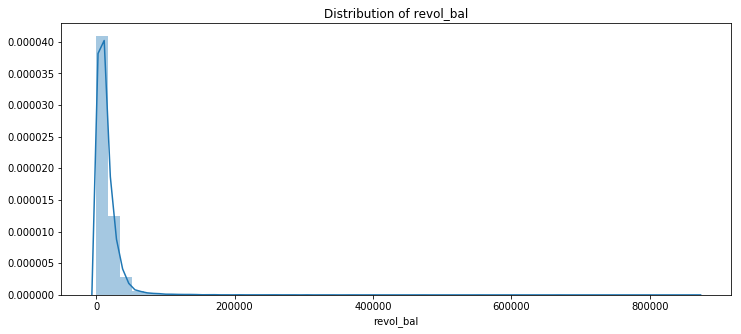

In [28]:
# Handling "revol_bal", "dti", and "annual_inc". Distribution of "revol_bal"
plt.figure(figsize=(12,5))
plt.title("Distribution of revol_bal")
ax = sns.distplot(app_train["revol_bal"])

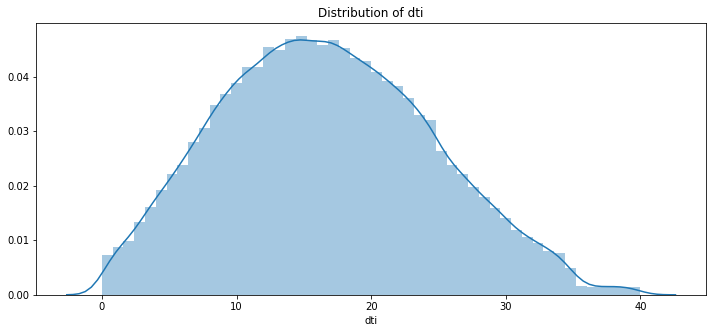

In [29]:
# Handling "revol_bal", "dti", and "annual_inc". Distribution of "revol_bal"
plt.figure(figsize=(12,5))
plt.title("Distribution of dti")
ax = sns.distplot(app_train["dti"])

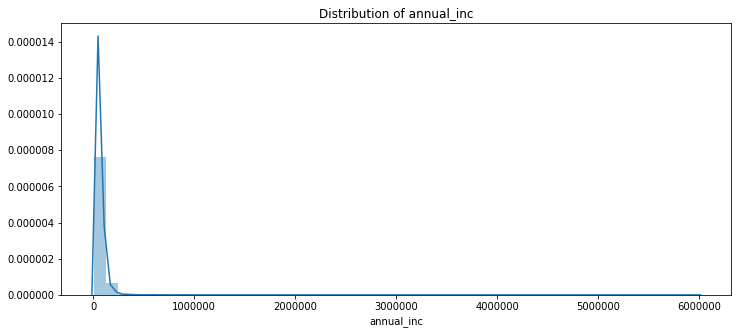

In [30]:
# Handling "revol_bal", "dti", and "annual_inc". Distribution of "revol_bal"
plt.figure(figsize=(12,5))
plt.title("Distribution of annual_inc")
ax = sns.distplot(app_train["annual_inc"])

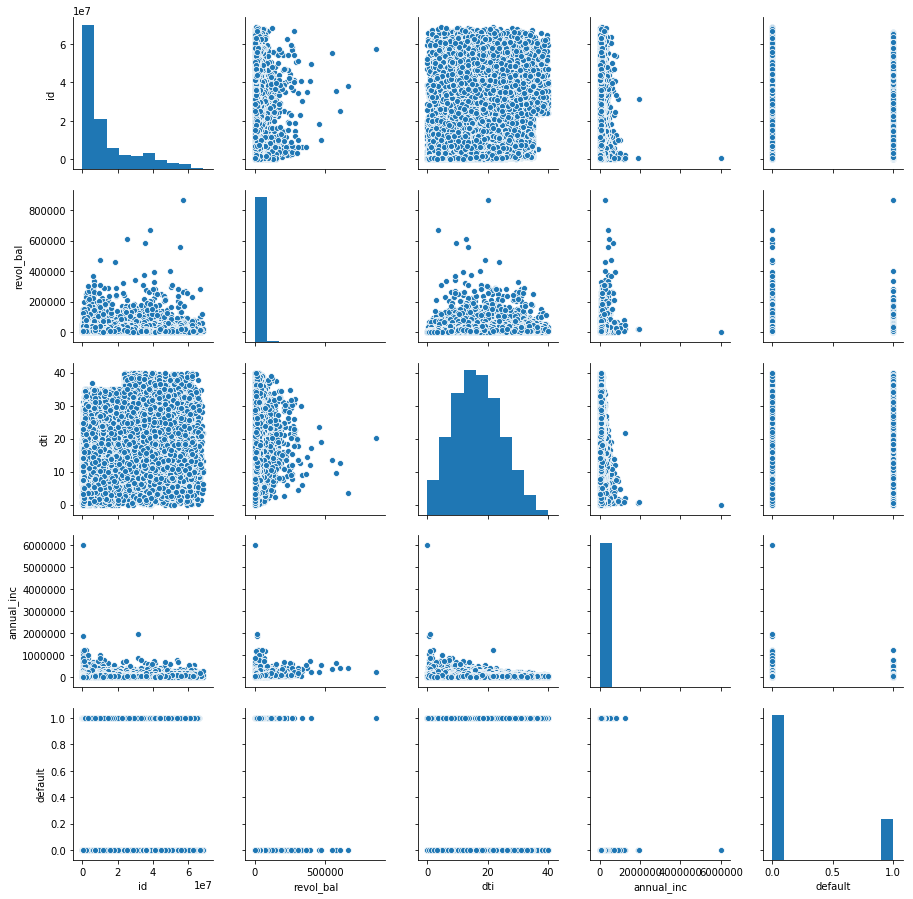

In [31]:
sns.pairplot(app_train)

# Impute Missing Data

In [32]:
app_train.isnull().sum()

id                        0
revol_bal                 0
purpose                   0
addr_state                0
home_ownership            0
earliest_cr_line          0
apply_date                0
verification_status       0
emp_length             2446
dti                       0
emp_title              3366
annual_inc                0
default                   0
dtype: int64

In [33]:
app_train.emp_length.value_counts()

10+ years    18298
2 years       5618
3 years       4895
< 1 year      4890
5 years       4243
1 year        3944
4 years       3788
6 years       3558
7 years       3311
8 years       2777
9 years       2253
Name: emp_length, dtype: int64

In [34]:
def impute_em_length(x):
    if x == "< 1 year": return 0
    elif x == "10+ years": return 10
    elif pd.isnull(x): return x
    else: return int(str(x).split(" ")[0])

In [35]:
app_train.isna().sum()

id                        0
revol_bal                 0
purpose                   0
addr_state                0
home_ownership            0
earliest_cr_line          0
apply_date                0
verification_status       0
emp_length             2446
dti                       0
emp_title              3366
annual_inc                0
default                   0
dtype: int64

In [36]:
app_train.emp_length = app_train.emp_length.apply(impute_em_length)

In [37]:
app_train.isnull().sum()

id                        0
revol_bal                 0
purpose                   0
addr_state                0
home_ownership            0
earliest_cr_line          0
apply_date                0
verification_status       0
emp_length             2446
dti                       0
emp_title              3366
annual_inc                0
default                   0
dtype: int64

In [38]:
# Impute "emp_length"
print("Median:", app_train.emp_length.median())
app_train.emp_length.value_counts(sort=True)
app_train.emp_length.fillna(6, inplace=True)

Median: 6.0


Notice: Choose to drop emp_title for now

In [39]:
#app_train.drop(['emp_title'], axis=1)
app_train = app_train.drop(['id', 'earliest_cr_line', 'apply_date', 'emp_title'], axis=1)


In [40]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60021 entries, 3 to 199993
Data columns (total 9 columns):
revol_bal              60021 non-null int64
purpose                60021 non-null object
addr_state             60021 non-null object
home_ownership         60021 non-null object
verification_status    60021 non-null object
emp_length             60021 non-null float64
dti                    60021 non-null float64
annual_inc             60021 non-null float64
default                60021 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 7.1+ MB


In [41]:
from sklearn import preprocessing

In [42]:
for x in app_train.columns:
    if app_train[x].dtype == 'object':
        label = preprocessing.LabelEncoder()
        label.fit(list(app_train[x].values))
        app_train[x] = label.transform(list(app_train[x].values))

In [43]:
app_train

,revol_bal,purpose,addr_state,home_ownership,verification_status,emp_length,dti,annual_inc,default
3,10768,1,8,1,0,10.0,24.31,66000.0,0
4,35551,4,46,1,2,2.0,1.70,110000.0,0
7,40836,2,33,1,0,6.0,19.86,98005.0,0
9,25237,2,37,5,0,10.0,20.01,55000.0,0
10,17469,2,39,5,1,10.0,16.76,71500.0,0
12,7992,2,2,1,1,10.0,18.22,93000.0,0
13,20720,2,10,1,2,10.0,20.73,40000.0,0
15,7953,2,23,1,1,10.0,29.38,23000.0,0
16,17212,1,32,5,2,3.0,25.20,48000.0,1
19,7839,2,26,5,2,3.0,14.29,54250.0,0


# Build a Random Forest model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [45]:
y = app_train.default
X = app_train.drop(columns=['default'])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [47]:
clf1 = RandomForestClassifier(n_estimators=500, max_depth=16)
clf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
pred1 = clf1.predict(X_test)

In [49]:
acc1 = accuracy_score(np.array(y_test), pred1)
acc1

0.7791969789526295

In [50]:
cm1 = confusion_matrix(y_test, pred1)
print(cm1)

[[13988    64]
 [ 3912    43]]


In [51]:
print(classification_report(y_test, pred1))

             precision    recall  f1-score   support

          0       0.78      1.00      0.88     14052
          1       0.40      0.01      0.02      3955

avg / total       0.70      0.78      0.69     18007



In [52]:
from sklearn.linear_model import LogisticRegression 

In [53]:
clf2 = LogisticRegression()

In [54]:
clf2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
pred2 = clf2.predict(X_test)

In [56]:
acc2 = accuracy_score(y_test, pred2)
acc2

0.7803631920919643

In [57]:
cm2 = confusion_matrix(y_test, pred2)
print(cm2)

[[14052     0]
 [ 3955     0]]


In [58]:
print(classification_report(y_test, pred2))

             precision    recall  f1-score   support

          0       0.78      1.00      0.88     14052
          1       0.00      0.00      0.00      3955

avg / total       0.61      0.78      0.68     18007



In [59]:
import xgboost
from xgboost import XGBClassifier as xgb

In [60]:
#data_dmatrix = xgboost.DMatrix(data=X, label=y)

In [61]:
clf3 = xgb(n_estimators=500, max_depth=15, learning_rate=0.2)

In [63]:
clf3.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=15, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [64]:
pred3 = clf3.predict(X_test)

C:\Users\thoan\Miniconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [65]:
acc3 = accuracy_score(np.array(y_test), pred3)
acc3

0.7522074748708836

In [66]:
cm3 = confusion_matrix(y_test, pred3)
print(cm3)

[[13174   878]
 [ 3584   371]]


In [67]:
print(classification_report(y_test, pred3))

             precision    recall  f1-score   support

          0       0.79      0.94      0.86     14052
          1       0.30      0.09      0.14      3955

avg / total       0.68      0.75      0.70     18007



In [68]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
svm_lin = svm.SVC(kernel='linear', C=50)
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)

In [69]:
X_train_new = scaling.transform(X_train)
X_test_new = scaling.transform(X_test)

In [ ]:
svm_lin.fit(X_train_new, y_train)

In [ ]:
pred_svm_lin = svm_lin.predict(X_test_new)

In [ ]:
acc4 = accuracy_score(np.array(y_test), pred_svm_lin)
acc4